In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'imblearn'

In [2]:
data = pd.read_csv(r'C:\Users\Dell\datastructure with python\patil_code\HepatitisCdata.csv')

In [3]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
data = data.drop('Unnamed: 0',axis=1)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [15]:
data['Category'].loc[data['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
data['Category'].loc[data['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0
data['Sex'].loc[data['Sex']=='m']=1
data['Sex'].loc[data['Sex']=='f']=0
data.fillna(data.median(), inplace=True)

In [16]:
data.corr()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.037781,0.071663,-0.179609,-0.067737,0.087787,0.621724,0.398451,-0.230785,-0.266003,0.136772,0.437680,0.084082
Age,0.037781,1.000000,-0.024544,-0.196842,0.168080,-0.005690,0.088666,0.032492,-0.075093,0.123789,-0.022296,0.153087,-0.153672
Sex,0.071663,-0.024544,1.000000,0.146138,-0.019808,0.161502,0.130891,0.111177,0.169111,-0.029251,0.159589,0.133276,0.051288
ALB,-0.179609,-0.196842,0.146138,1.000000,-0.138015,0.001444,-0.193342,-0.221641,0.375817,0.204731,-0.001594,-0.155440,0.549975
ALP,-0.067737,0.168080,-0.019808,-0.138015,1.000000,0.166320,0.059637,0.046780,0.033750,0.123197,0.149831,0.440012,-0.055869
ALT,0.087787,-0.005690,0.161502,0.001444,0.166320,1.000000,0.273333,-0.038388,0.146729,0.067716,-0.043000,0.248208,0.095016
AST,0.621724,0.088666,0.130891,-0.193342,0.059637,0.273333,1.000000,0.312231,-0.208536,-0.207938,-0.021387,0.491263,0.039999
BIL,0.398451,0.032492,0.111177,-0.221641,0.046780,-0.038388,0.312231,1.000000,-0.333172,-0.157282,0.031224,0.217024,-0.040729
CHE,-0.230785,-0.075093,0.169111,0.375817,0.033750,0.146729,-0.208536,-0.333172,1.000000,0.420215,-0.011157,-0.110345,0.293041
CHOL,-0.266003,0.123789,-0.029251,0.204731,0.123197,0.067716,-0.207938,-0.157282,0.420215,1.000000,-0.047437,-0.007185,0.206255


In [17]:
data = pd.get_dummies(data, columns = ['Sex'],drop_first=True)
data.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_1
0,0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,0,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,0,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,0,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,0,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1


<AxesSubplot:>

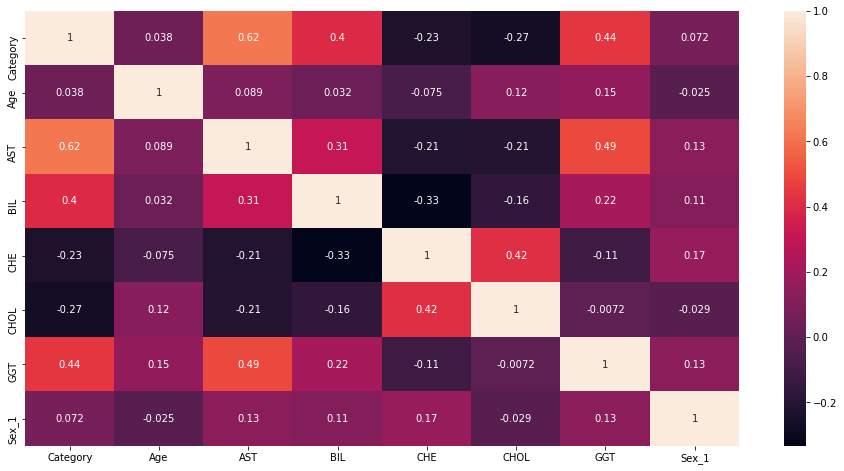

In [34]:
data = data.drop(columns = ['ALP','ALT','CREA','PROT','ALB'])
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)


In [35]:
robust_sc = preprocessing.RobustScaler()
standard_sc = preprocessing.StandardScaler() 
minmax_sc = preprocessing.MinMaxScaler()

In [36]:
X = data.drop(['Category'],axis=1)
y = data["Category"]

In [37]:
for x in [robust_sc,standard_sc,minmax_sc]:
    %time
    resultado = []
    scaler = x.fit(X)
    X_new = x.transform(X)
    tree = DecisionTreeClassifier(max_depth=25,random_state=42)
    tree.fit(X_new,y)
    y_pred = tree.predict(X_new)
    f1sc=f1_score(y, y_pred, average='weighted')
    rauc=(y, y_pred)
    resultado.append(f1sc)
    print("El scaled used--->",x)
    print("f1 according to the type of strategy:",f1sc)
    print("----------------------------------------")

Wall time: 0 ns
El scaled used---> RobustScaler()
f1 according to the type of strategy: 1.0
----------------------------------------
Wall time: 0 ns
El scaled used---> StandardScaler()
f1 according to the type of strategy: 1.0
----------------------------------------
Wall time: 0 ns
El scaled used---> MinMaxScaler()
f1 according to the type of strategy: 1.0
----------------------------------------


In [38]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [39]:
over = SMOTE()
overs = RandomOverSampler()
under = RandomUnderSampler()
steps = [('o', over), ('os', overs),('u',under)]
pipeline = Pipeline(steps=steps)

In [40]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [41]:
X_train=standard_sc.fit_transform(X_train)
X_test=standard_sc.transform(X_test)

In [42]:
def confusion(y_test,y_test_pred,X):
    names=['Non Hepatitis','Hepatitis']
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return


In [43]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
score = RF.score(X_test,y_test)
score

0.9621621621621622

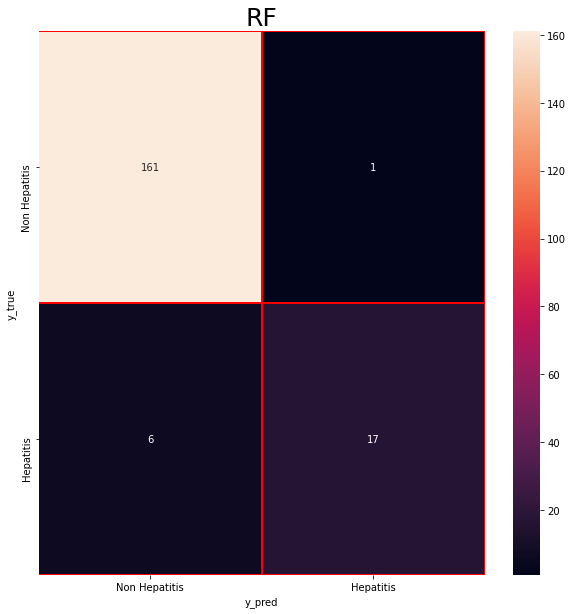

In [44]:
confusion(y_test,pred,"RF")